# Parse the results and display them

In [2]:
import os
import sys
maindir = os.getcwd()
sys.path.append(maindir+"/src")

In [3]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

In [7]:
# read data

# ridge regression
with open("results/ridge/rmse_ridge.pkl", "rb") as f:
    rmse_ridge = pickle.load(f)

with open("results/ridge/w_ridge.pkl", "rb") as f:
    w_ridge = pickle.load(f)

with open("results/ridge/weights_ridge.pkl", "rb") as f:
    weights_ridge = pickle.load(f)

# ridge regression with low-rank constraint
with open("results/ridge_low_rank/rmse_ridge_lr.pkl", "rb") as f:
    rmse_ridge_lowrank = pickle.load(f)

with open("results/ridge_low_rank/w_ridge_lr.pkl", "rb") as f:
    w_ridge_lowrank = pickle.load(f)

with open("results/ridge_low_rank/weights_ridge_lr.pkl", "rb") as f:
    weights_ridge_lowrank = pickle.load(f)


# robust regression
with open("results/robust/rmse_robust.pkl", "rb") as f:
    rmse_robust = pickle.load(f)

with open("results/robust/w_robust.pkl", "rb") as f:
    w_robust = pickle.load(f)

with open("results/robust/weights_robust.pkl", "rb") as f:
    weights_robust = pickle.load(f)


In [21]:
# define range of values
mu_range_tmp = np.array([100.0,500.0, 1000.0, 5000.0,10000.0])
lambda_range_tmp = np.array([0.1, 1.0,10.0,100.0, 1000.0])


# convert to dictionary of tensor 
rmse_ridge_tmp = {(lambda_,mu_): torch.tensor(list(rmse_ridge[(lambda_,mu_)].values())) for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_ridge_lowrank_tmp = {(lambda_,mu_): torch.tensor(list(rmse_ridge_lowrank[(lambda_,mu_)].values())) for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_robust_tmp = {(lambda_,mu_): torch.tensor(list(rmse_robust[(lambda_,mu_)].values())) for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}

# get worst and mean error of rmse ridge
rmse_ridge_worst_loo = {(lambda_,mu_): torch.max(rmse_ridge_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_ridge_mean_loo = {(lambda_,mu_): torch.mean(rmse_ridge_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}

# get worst and mean error of rmse ridge low rank
rmse_ridge_lowrank_worst_loo = {(lambda_,mu_): torch.max(rmse_ridge_lowrank_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_ridge_lowrank_mean_loo = {(lambda_,mu_): torch.mean(rmse_ridge_lowrank_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}

# get worst and mean error of rmse robust
rmse_robust_worst_loo = {(lambda_,mu_): torch.max(rmse_robust_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}
rmse_robust_mean_loo = {(lambda_,mu_): torch.mean(rmse_robust_tmp[(lambda_,mu_)]).item() for lambda_ in lambda_range_tmp for mu_ in mu_range_tmp}



In [24]:
# get the best (worst and mean) rmse for each method
best_worst_ridge = min(rmse_ridge_worst_loo, key=rmse_ridge_worst_loo.get)
best_worst_ridge_lowrank = min(rmse_ridge_lowrank_worst_loo, key=rmse_ridge_lowrank_worst_loo.get)
best_worst_robust = min(rmse_robust_worst_loo, key=rmse_robust_worst_loo.get)

best_mean_ridge = min(rmse_ridge_mean_loo, key=rmse_ridge_mean_loo.get)
best_mean_ridge_lowrank = min(rmse_ridge_lowrank_mean_loo, key=rmse_ridge_lowrank_mean_loo.get)
best_mean_robust = min(rmse_robust_mean_loo, key=rmse_robust_mean_loo.get)


In [28]:
# define the best rmse for each method
rmse_best_worst_ridge = rmse_ridge[(best_worst_ridge)]
rmse_best_worst_ridge_lowrank = rmse_ridge_lowrank[(best_worst_ridge_lowrank)]
rmse_best_worst_robust = rmse_robust[(best_worst_robust)]

rmse_best_mean_ridge = rmse_ridge[(best_mean_ridge)]
rmse_best_mean_ridge_lowrank = rmse_ridge_lowrank[(best_mean_ridge_lowrank)]
rmse_best_mean_robust = rmse_robust[(best_mean_robust)]


In [30]:
################### Ridge regresssion ########################
# compute the ridge loo
rmse_ridge_tmp =  np.array(list(rmse_best_worst_ridge.values()))

# worst loo Ridge
worst_loo_ridge = np.max(rmse_ridge_tmp)
mean_loo_ridge = np.mean(rmse_ridge_tmp)


# quantile 95, 90, 75
q_loo_95_ridge = np.quantile(rmse_ridge_tmp, 0.95)
q_loo_90_ridge = np.quantile(rmse_ridge_tmp, 0.90)
q_loo_75_ridge = np.quantile(rmse_ridge_tmp, 0.75)
q_loo_50_ridge = np.quantile(rmse_ridge_tmp, 0.5)


######################## compute the ridge rrr ######################
rmse_rrr_tmp =  np.array(list(rmse_best_worst_ridge_lowrank.values()))

# worst loo Ridge
worst_loo_rrr = np.max(rmse_rrr_tmp)
mean_loo_rrr = np.mean(rmse_rrr_tmp)


# quantile 95, 90, 75
q_loo_95_rrr = np.quantile(rmse_rrr_tmp, 0.95)
q_loo_90_rrr = np.quantile(rmse_rrr_tmp, 0.90)
q_loo_75_rrr = np.quantile(rmse_rrr_tmp, 0.75)
q_loo_50_rrr = np.quantile(rmse_rrr_tmp, 0.5)


######################## compute the robust regression ######################
rmse_robust_tmp =  np.array(list(rmse_best_worst_robust.values()))

# worst loo Ridge
worst_loo_robust = np.max(rmse_robust_tmp)
mean_loo_robust = np.mean(rmse_robust_tmp)


# quantile 95, 90, 75
q_loo_95_robust = np.quantile(rmse_robust_tmp, 0.95)
q_loo_90_robust = np.quantile(rmse_robust_tmp, 0.90)
q_loo_75_robust = np.quantile(rmse_robust_tmp, 0.75)
q_loo_50_robust = np.quantile(rmse_robust_tmp, 0.5)

######################## compute the robust regression with low rank constraint ######################
rmse_robust_rrr =  np.array(list(rmse_best_worst_robust.values()))

# worst loo Ridge
worst_loo_robust_rrr = np.max(rmse_robust_rrr)
mean_loo_robust_rrr = np.mean(rmse_robust_rrr)


# quantile 95, 90, 75
q_loo_95_robust_rrr = np.quantile(rmse_robust_rrr, 0.95)
q_loo_90_robust_rrr = np.quantile(rmse_robust_rrr, 0.90)
q_loo_75_robust_rrr = np.quantile(rmse_robust_rrr, 0.75)
q_loo_50_robust_rrr = np.quantile(rmse_robust_rrr, 0.5)


print("======= Statistics ========")
print("\n")
print("          Ridge   RR-Lr   Robust  Robust-Lr")
print("Worst:    {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(worst_loo_ridge,worst_loo_rrr,worst_loo_robust, worst_loo_robust_rrr))
print("0.95:     {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_95_ridge,q_loo_95_rrr,q_loo_95_robust, q_loo_95_robust_rrr))
print("0.90:     {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_90_ridge,q_loo_90_rrr,q_loo_90_robust, q_loo_90_robust_rrr))
print("0.75:     {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_75_ridge,q_loo_75_rrr,q_loo_75_robust, q_loo_75_robust_rrr))
print("Median:   {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(q_loo_50_ridge,q_loo_50_rrr,q_loo_50_robust, q_loo_50_robust_rrr))
print("Mean:     {:.3f}   {:.3f}   {:.3f}   {:.3f}".format(mean_loo_ridge,mean_loo_rrr,mean_loo_robust, mean_loo_robust_rrr))

======= Statistics ========


          Ridge   RR-Lr   Robust  Robust-Lr
Worst:    1.401   2.271   1.155   1.155
0.95:     1.156   1.963   1.002   1.002
0.90:     0.912   1.536   0.797   0.797
0.75:     0.541   0.884   0.496   0.496
Median:   0.168   0.459   0.234   0.234
Mean:     0.342   0.671   0.359   0.359


In [51]:
# get the best (worst and mean) weights for each method and display them as histograms
# Robust regression
weights_robust_best_worst = weights_robust[(best_worst_robust)]
weights_robust_best_worst_tmp = {key: torch.tensor(list(weights_robust_best_worst[key].values())) for key in weights_robust_best_worst.keys()}
weights_robust_best_worst_to_plot = torch.mean(torch.stack(list(weights_robust_best_worst_tmp.values())), dim=0)

/tmp/ipykernel_44769/3898585826.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list(weights_robust_best_worst_tmp.keys()), rotation=-90)


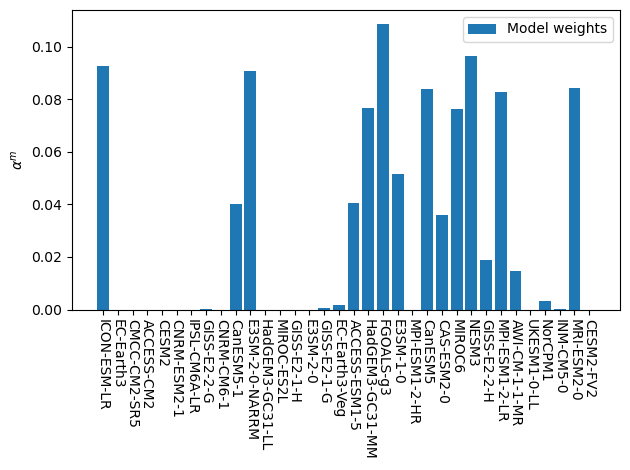

In [52]:
# display histogram of values in weights
# plt.figure()
# plt.hist(weights_robust_best_worst_to_plot, bins=50)
# plt.title("Histogram of weights for robust regression")
# plt.xlabel("Value")
# plt.ylabel("Frequency")

fig, ax = plt.subplots()
ax.bar(list(weights_robust_best_worst_tmp.keys()), weights_robust_best_worst_to_plot.detach().numpy(),label='Model weights')
ax.set_ylabel(r'$\alpha^m$')
ax.legend()
ax.set_xticklabels(list(weights_robust_best_worst_tmp.keys()), rotation=-90)
plt.tight_layout()
# plt.savefig("results/weights_"+str(mu_)+"_"+str(lambda_)+".eps", dpi=150)
plt.show()



# plt.savefig("results/robust/histogram_weights_robust.png")
# plt.close()
